# Machine Learning Model

The Machine Learning Model for Delivery 2 of Module 4.2 is based on provided data from KEA's Facility Management about KEA's energy consumption from May 2018 - October 2022.

---

The usable data is provided as following:

1. Measuring unit - Contains 1 of 3 different serial numbers which can be grouped
2. Amount - Numeric value containing the amount measured by a certain unit per day
3. Date - The data the measurement was taken
4. Quality - Tells is the line was measured or estimated
5. Unit - Unit of the amount measured or estimated

To only focus on the relevant variables and structure the data, the following will be manipulated:

1. The Unit will be eliminated because all lines share the same value (KWH)
2. The Quality will be eliminated as there are only 3 estimates which should not effect the results at all
3. The Date will be split into Year, Month, and Day
4. The column "status" will be added, giving information if there was any energy consumption for that unit during a certain day

In [1]:
# Imports
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy
from sklearn.metrics import r2_score

In [2]:
# Import the data sheet
df_a = pd.read_csv("A.csv", encoding = "ISO-8859-1", delimiter = ";")

# Display first 5 rows
df_a.head()

,ï»¿measuring_unit,amount_kwh,status,year,month,day
0,Unit 1,389,1,2018,5,28
1,Unit 1,416,1,2018,5,29
2,Unit 1,434,1,2018,5,30
3,Unit 1,492,1,2018,5,31
4,Unit 1,434,1,2018,6,1


Because this data does not provide much value yet, the following steps will be done:
1. The Units will be grouped, the totals of the day will be displayed
2. The Weekday will be displayed
3. The Weeknumber will be displayed
4. A day counter will be displayed (1-365)

In [3]:
# Import the data sheet
df_b = pd.read_csv("B.csv", encoding = "ISO-8859-1", delimiter = ";")

# Display first 5 rows
df_b.head()

,ï»¿year_num,month_num,day_num,total_per_day,weekday,weekday_num,weeknumber,day_counter
0,2018,7,21,78,Sat,6,29,202
1,2018,7,22,90,Sun,7,29,203
2,2018,7,23,88,Mon,1,30,204
3,2018,7,24,99,Tue,2,30,205
4,2018,7,25,82,Wed,3,30,206


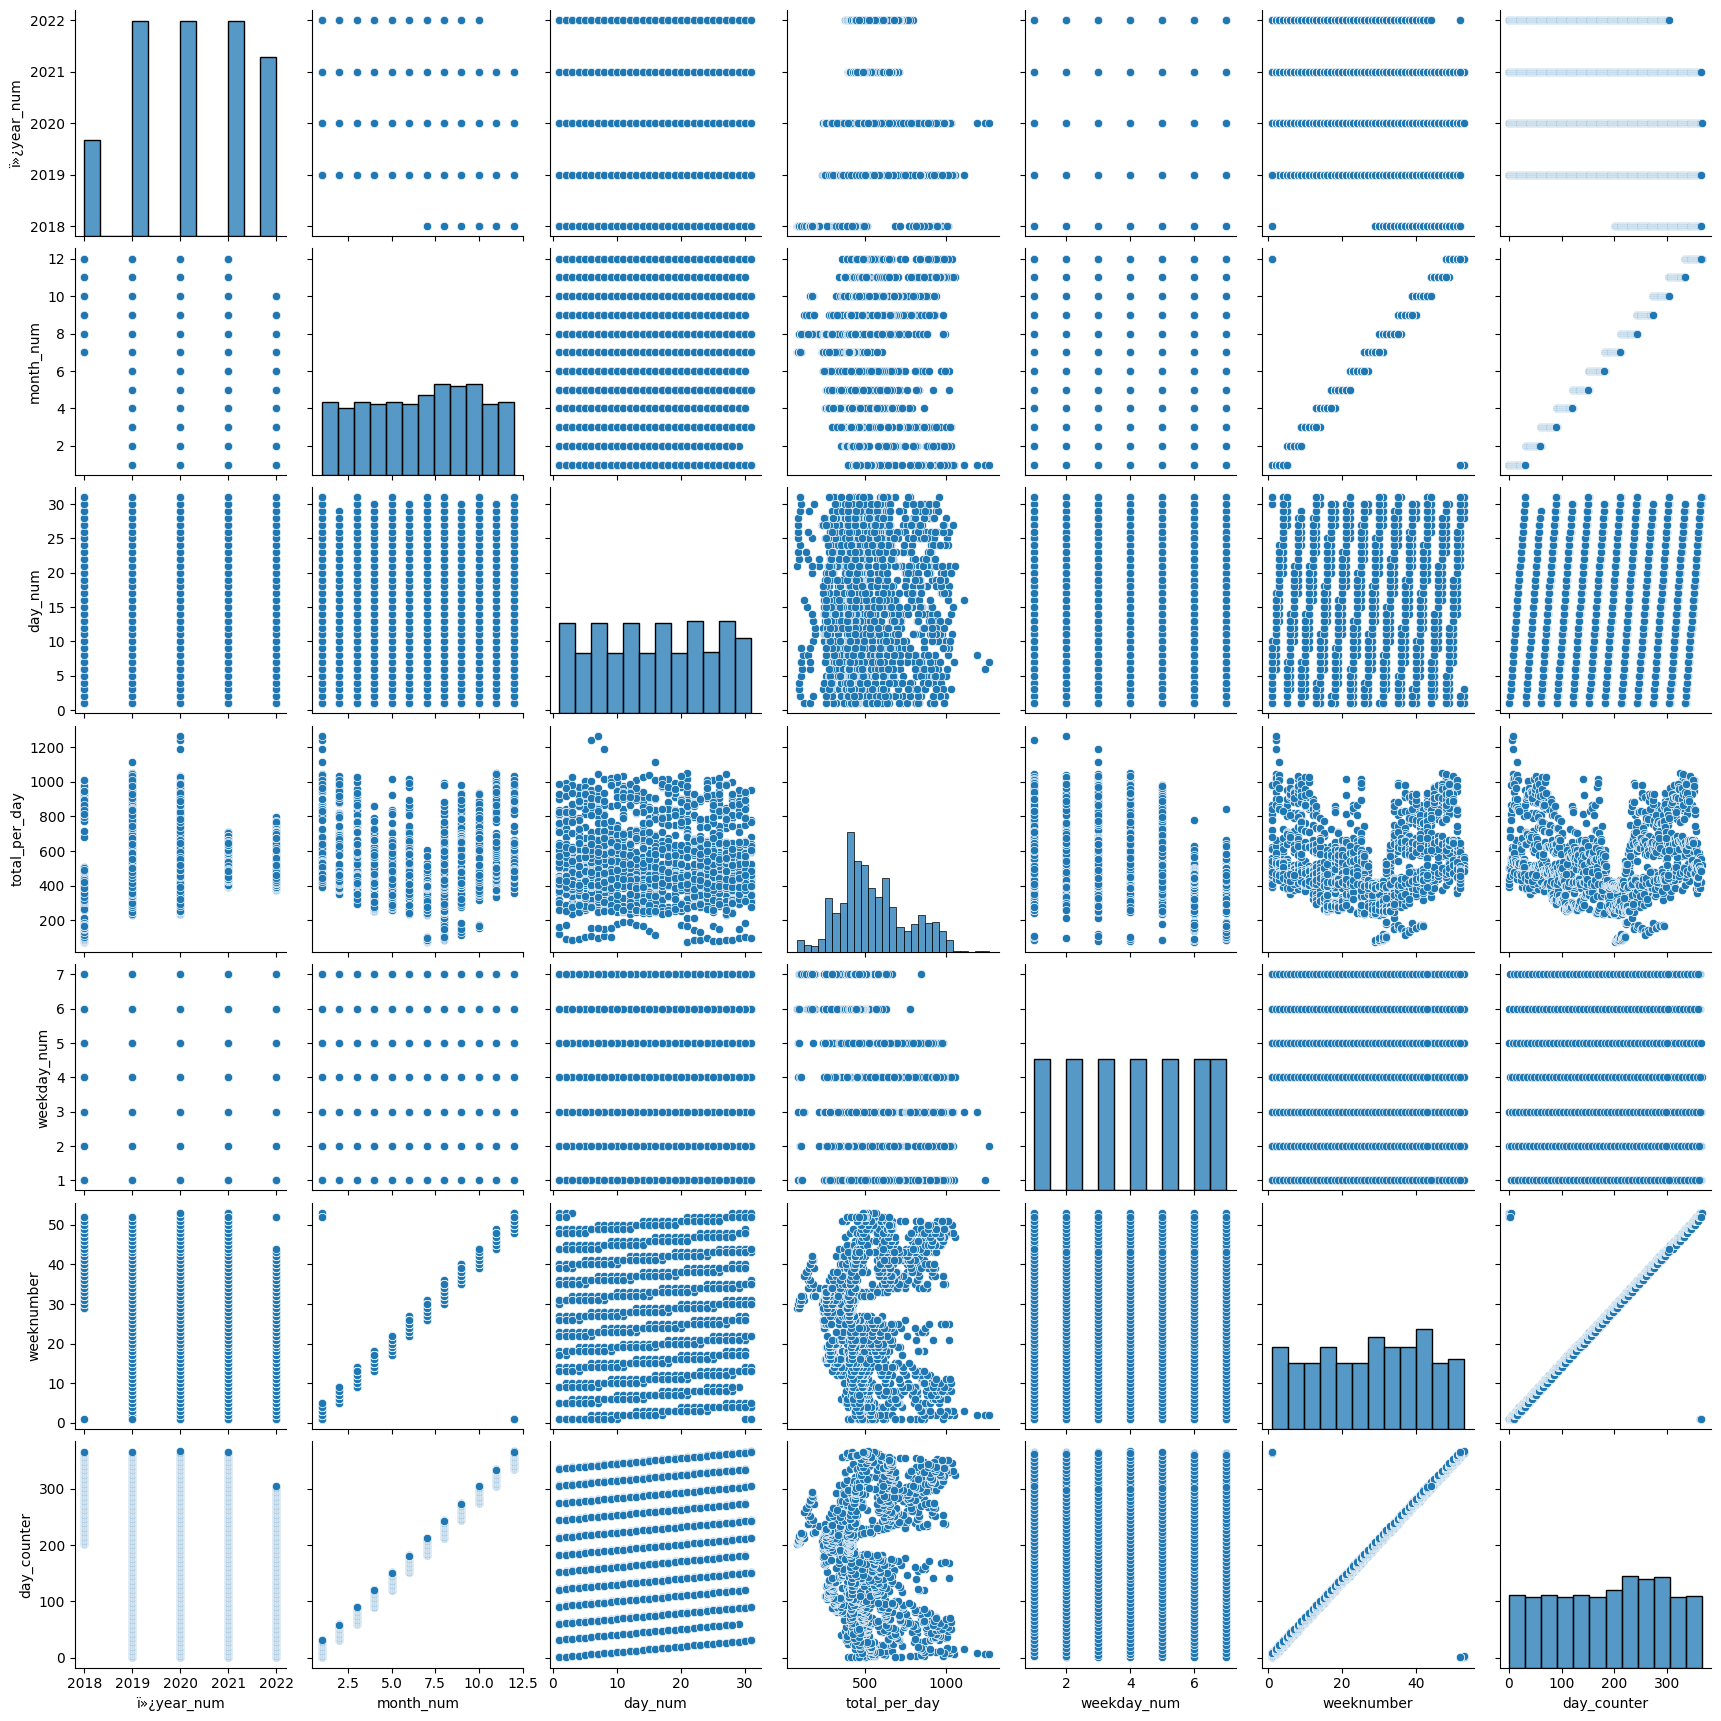

In [4]:
# Finding correlations
sns.pairplot(df_b)

The only correlation can be found between the weeknumber and total_per_day variables. Because the data is still all over the place, let's focus on getting the averages per week instead of plotting all values.

And to make it more interesting, let's mix in some external temperature data.

In [5]:
# Import the data sheet
df_c = pd.read_csv("C.csv", encoding = "ISO-8859-1", delimiter = ";")

# Display first 5 rows
df_c.head()

,ï»¿week,daily_av_that_week,av_temp_that_week
0,1,590,3
1,2,720,3
2,3,659,3
3,4,548,2
4,5,591,1


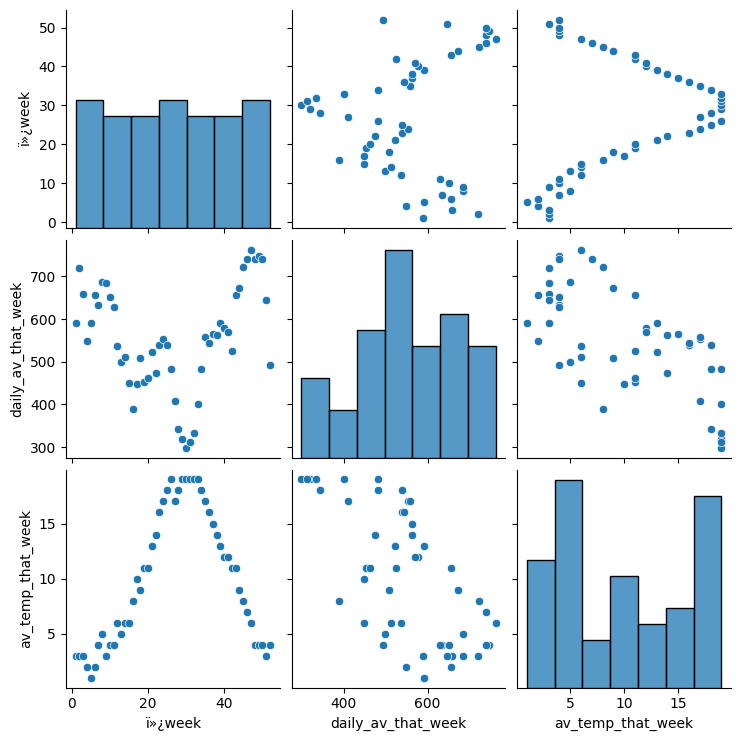

In [6]:
# Finding correlations
sns.pairplot(df_c)

When comparing "av_temp_that_week" with "daily_av_that_week", the data looks somehow explaniable and there is definitely a correlation. The Residuals as well as the margin of error during assumptions would be way to high, which is why we will stick to the "week", "daily_av_that_week". There is definitely a good correlation visible, that should be predictable using polynomial regression.

## Building the model

In [9]:
# preparing the data
x1 = numpy.array(df_c["ï»¿week"])
y1 = numpy.array(df_c["daily_av_that_week"])

To make sure the right amount of exponents are used, lets check and display the accuracy as the R2-Score in a plot.

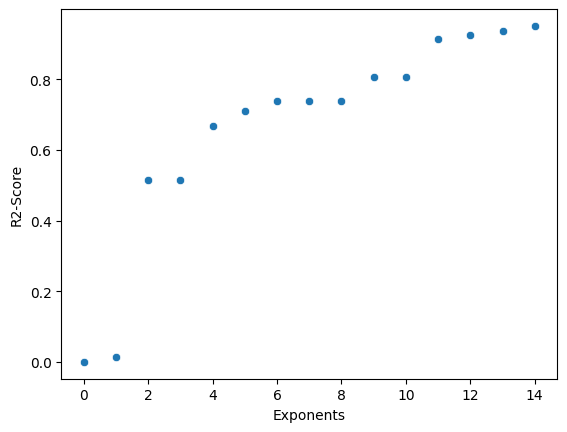

In [10]:
x_exp = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
y_r2 = []

for i in range(15):
    model_test = numpy.poly1d(numpy.polyfit(x1, y1, i))
    y_r2.append(r2_score(y1, model_test(x1)))
    
fig_r2 = sns.scatterplot(x=x_exp, y=y_r2)

# Set x-axis and y-axis labels
fig_r2.set_xlabel("Exponents")
fig_r2.set_ylabel("R2-Score")

# Show the plot
plt.show()

The last large incline is seen at exponent 11 with an R2-Score of around 0.9.
This exponent will be used for building the model.

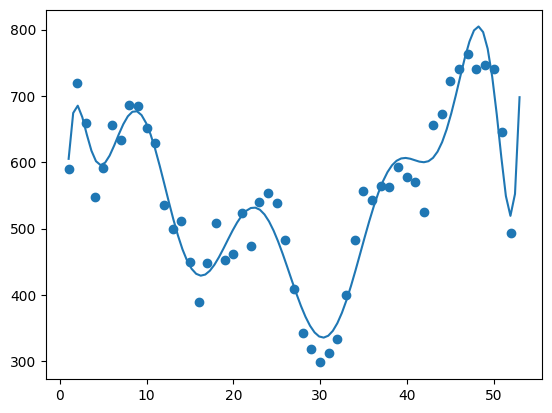

In [12]:
model = numpy.poly1d(numpy.polyfit(x1, y1, 11))

# creating the polyline
polyline = numpy.linspace(1, 53, 100)

plt.scatter(x1, y1)
plt.plot(polyline, model(polyline))
plt.show()

In [13]:
# To check the models accuracy, lets print the R2-score
print(r2_score(y1, model(x1)))

0.9148701815672148


In [16]:
# Lets make a prediction the daily average energy consumption in KWH for week 30
print(model(30))

336.4893461539878


## Checking model assumptions
The following will be checked for polynomial regression models:
1. The relationship between the dependent variable and any independent variable is linear or curvilinear
2. The errors are independent, normally distributed with mean zero and a constant variance

In [17]:
# subset x variable
df_X1 = df_c["ï»¿week"]

# Get predictions from model
predicted_values = model(df_X1)
# Real values from df_c
actual_values = numpy.array(df_c["daily_av_that_week"])

In [18]:
# Calculate residuals
residuals = []
i = 0
for predicted_value in predicted_values:
    
    actual_value = actual_values[i]

    diff = actual_value - predicted_value
    residuals.append(diff)
    i += 1

### The relationship between the dependent variable and any independent variable is linear or curvilinear

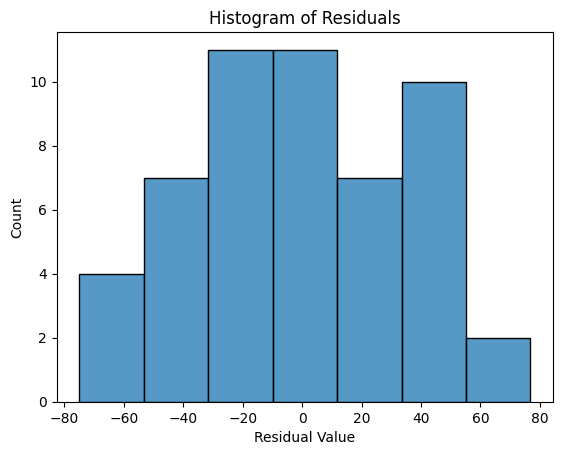

In [19]:
# display the residuals
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

From this diagram, the assumption of a curvilinear relationship is confirmed.

### The errors are independent, normally distributed with mean zero and a constant variance

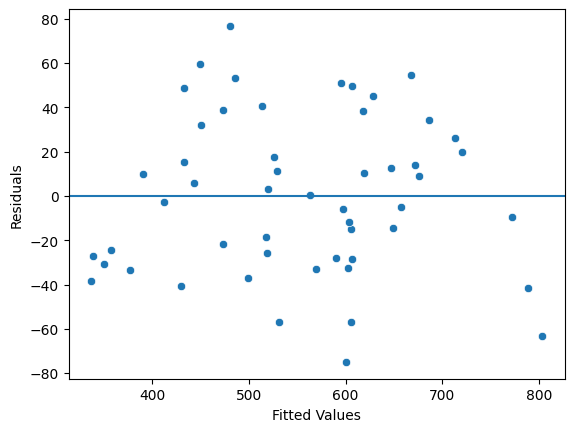

In [20]:
fig = sns.scatterplot(x=predicted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

The plotted data seems to be completely random, which fulfills the assumption that the model's residuals are independent, normally distributed and have a constant variance.

## Try the model here
"print(model(x))", x = weeknumber; get an prediction of the daily energy consumption during week x

In [21]:
print(model(1))

605.0498976909294
